# Exploring the Data

## Setting up the data from our spaces

In [1]:
import os
import numpy as np
from numpy.random import random

import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import linear_model 
from __future__ import division

from sympy import *
from sympy import Rational
from sympy.core.numbers import ilcm

from collections import defaultdict
import pickle

We store and pre-process the raw data in another jupyter notebook, so we recall it from there

In [30]:
DataGIT=pickle.load( open( "DataGIT.p", "rb" ) )

In [11]:
#DataGIT2=pickle.load( open( "DataGIT2.p", "rb" ) )
#DataGIT=pd.concat([DataGIT, DataGIT2])

In [32]:
DataGIT.shape

(20, 9)

In [6]:
d0=DataGIT.shape[0]

## Visuaizing the Geometric Data


### One parameter subgroups

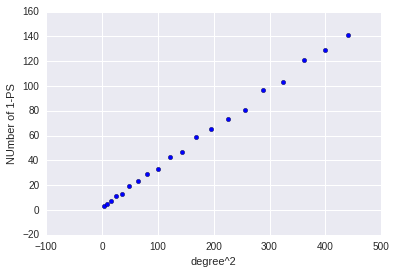

In [7]:
plt.scatter(y=DataGIT["Number1PS"], x=DataGIT.index**2 )
plt.xlabel("degree^2")
plt.ylabel("NUmber of 1-PS")
plt.show()

[ 2.54154724] [[ 0.31757373]] 0.998428634942


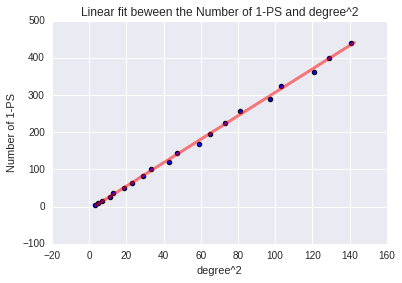

In [8]:
linear=linear_model.LinearRegression()
y=DataGIT["Number1PS"].ix[:].to_frame()
X=(DataGIT.index**2).values.reshape(len(DataGIT.index),1)
linear.fit(X,y )
y_pred = linear.predict(X)
print linear.intercept_, linear.coef_, linear.score(X,y)
plt.plot(y_pred ,X, color='red',linewidth=3, alpha=0.5)
plt.scatter(DataGIT["Number1PS"], DataGIT.index**2 , linewidth=1)
plt.ylabel("Number of 1-PS")
plt.xlabel("degree^2")
plt.title("Linear fit beween the number of 1-PS and degree^2")
plt.show()                                                

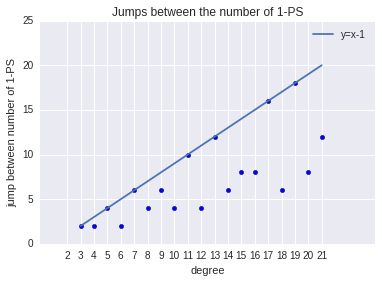

In [9]:
D1PS=[DataGIT["Number1PS"][i+1]-DataGIT["Number1PS"][i]  
      for i in DataGIT["Number1PS"].index[:-1]]
plt.scatter(DataGIT.index.values[1:], D1PS)
fig=plt.plot(DataGIT.index[1:], DataGIT.index[1:]-1)
plt.ylabel("jump between number of 1-PS")
plt.xlabel("degree")
plt.title("Jumps between the number of 1-PS")
plt.xticks(DataGIT.index)
plt.legend([fig[0]],["y=x-1"])
plt.show()

The following function is the one that related the Farey sequences with the Rieman Hypothesis

[-0.02085106] [[ 0.02524782]] 0.953658945655


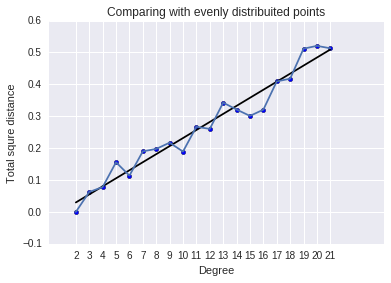

In [10]:
S= [ sum([ ( i[1]- i[0]/(len(DataGIT["Parameter"][s])-1))**2 
          for i in enumerate(DataGIT["Parameter"][s])])  
    for s in DataGIT.index.values]   

linear=linear_model.LinearRegression()
y_target=Series(S).values.reshape(len(S),1)
X=DataGIT.index.values.reshape(len(S),1)
linear.fit(X,y_target)
y_pred=linear.predict(X)

print linear.intercept_,linear.coef_, linear.score(X,y_target)

plt.plot(X,y_pred, color="black")
plt.scatter(x=DataGIT.index, y=S)
plt.plot(DataGIT.index,S[:])
plt.title("Comparing with evenly distribuited points")
plt.ylabel("Total squre distance")
plt.xlabel("Degree")
plt.xticks(DataGIT.index)
plt.show()

Next, we ilustrate the behavior of the one parameter subgroups for different degrees. In the following plot the height of the points correspond to the respective degree. Recall that we calculate them from degree=2 to degree=21. The x axis are the values of the parameters.

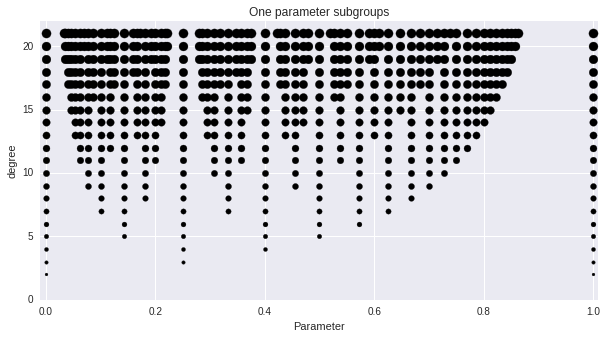

In [11]:
plt.figure(figsize=(10,5))
for i in DataGIT.index:
    val = i
    k=0.1+(0.9-0.1)*i/21
    L=DataGIT["Parameter"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=4*i, alpha=1)
    
    plt.xlabel('Parameter')
    plt.ylabel('degree')
    plt.title("One parameter subgroups")
    plt.axis([-0.01, 1.01, 0, d0+2])
plt.show()    

### GIT walls

[-4.21222435] [[ 0.09050308]] 0.997478367045


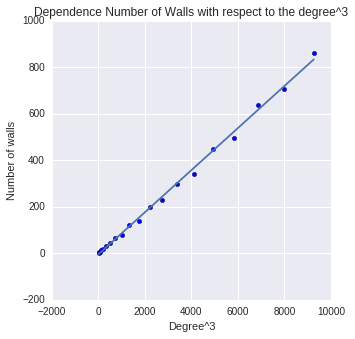

In [12]:
y= (DataGIT.NumberWalls).values.reshape(len(DataGIT.index),1)
X=(DataGIT.index**3).values.reshape(len(DataGIT.index),1)
linear.fit(X,y)
y_pred=linear.predict(X)
print linear.intercept_, linear.coef_, linear.score(X,y)

plt.figure(figsize=(5,5))

plt.scatter(DataGIT.index.values**3,DataGIT["NumberWalls"])
plt.plot(X,y_pred )

plt.title("Dependence Number of Walls with respect to the degree^3")
plt.xlabel("Degree^3")
plt.ylabel("Number of walls")
plt.show()

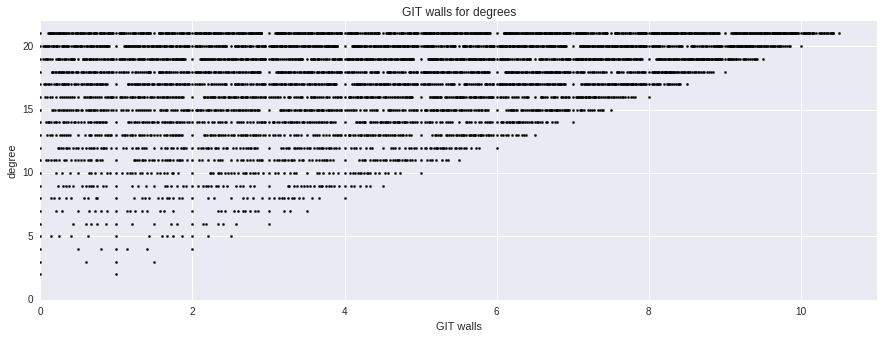

In [13]:
plt.figure(figsize=(15,5))
for i in DataGIT.index:
    val = i
    L=DataGIT["GITWalls"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=5)
    plt.xlabel('GIT walls')
    plt.ylabel('degree')
    plt.title("GIT walls for degrees")
    plt.axis([0, 11.01, 0, 22])
plt.show()    

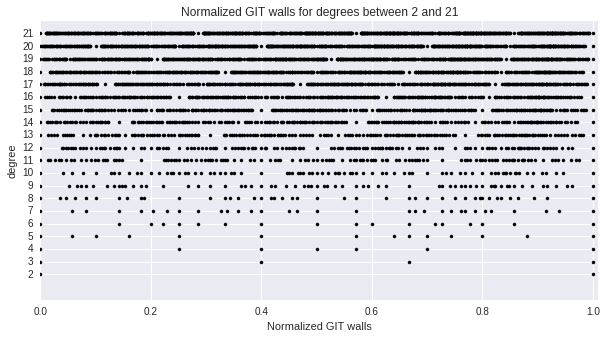

In [14]:
plt.figure(figsize=(10,5))
for i in DataGIT.index:
    val = i
    L=DataGIT["NormalizedGITWalls"].ix[i]
    plt.scatter(L, np.zeros_like(L) + val, color="black", s=10)
    plt.xlabel('Normalized GIT walls')
    plt.ylabel('degree')
    #plt.xticks(DataGIT["NormalizedGITWalls"].ix[4])
    plt.yticks(DataGIT.index)
    plt.title("Normalized GIT walls for degrees between {} and {}".format(2,21))
    plt.axis([0, 1.01, 0, 22])
plt.show()   

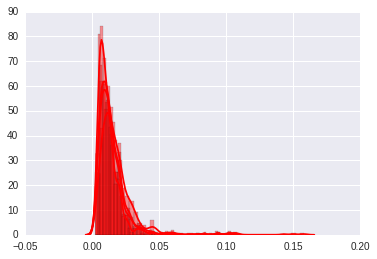

In [15]:
for s in DataGIT.index[d0-4:d0]:
    k=len(DataGIT["Diff_GITWalls"].ix[s])
    F=[i for i in DataGIT["Diff_GITWalls"].ix[s]];
    sns.distplot(Series(F,dtype=float), color="red")
    

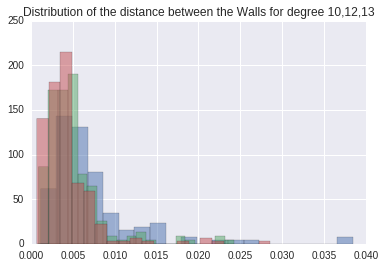

In [16]:
for s in DataGIT.index[10:13]:
    plt.hist(DataGIT["Diff_NormalizedGITWalls"].ix[s], 
             normed=True,alpha=0.5, bins=20)
plt.title(
"Distribution of the distance between the Walls for degree {},{},{}".format(10,12,13))
plt.show()    


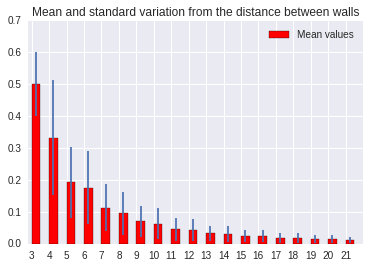

In [17]:
fig=plt.bar(DataGIT.index[1:],
        [Series(DataGIT["Diff_GITWalls"].ix[s]).mean() 
         for s in DataGIT.index[1:] ]
        ,width=0.5, color="r",
        yerr=[Series(DataGIT["Diff_GITWalls"].ix[s]).std() 
              for s in DataGIT.index[1:]]
       )

plt.axis([2.8,22,0,0.7])
plt.xticks((DataGIT.index[1:]))
plt.title("Mean and standard variation from the distance between walls")
p = plt.Rectangle((0, 0), 1, 1, fc="r")
plt.legend([fig[0]], ["Mean values"])

plt.show()

In [18]:
#import matplotlib.pyplot as plt
#img = plt.imread("/projects/ab71f49a-9c01-40ea-8d49-e8e1253e5a9d/CurvesGIT/IMG.jpg")

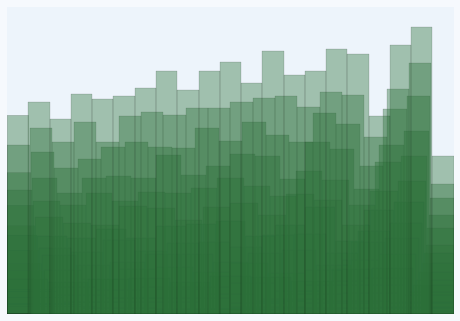

In [19]:
AllWalls=[]

for j in DataGIT.index:
    k=0.1+(0.9-0.1)*j/21
    sns.set(rc={'axes.facecolor':(0.360, 0.615, 0.878,1/18), 'figure.facecolor':(0.360, 0.615, 0.878,1/18)})
    AllWalls=AllWalls+DataGIT["NormalizedGITWalls"].ix[j]
    sns.distplot(AllWalls,bins=1*j,kde=False, color= (0.176, 0.443, 0.227,1-k/8))    
    
plt.xticks(())
plt.yticks(())
plt.show()

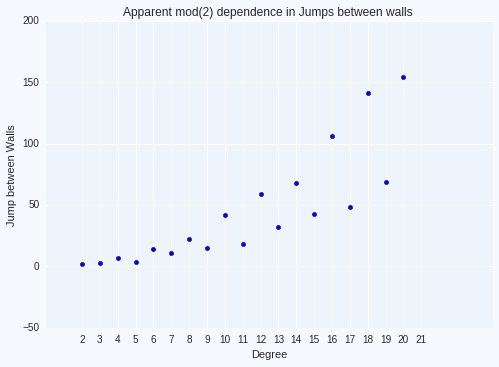

In [20]:
DWalls=[DataGIT["NumberWalls"][i+1]-DataGIT["NumberWalls"][i]  
        for i in DataGIT["NumberWalls"].index[:-1]]
plt.scatter(DataGIT.index[:-1], DWalls)
plt.ylabel("Jump between Walls")
plt.xlabel("Degree")
plt.xticks(DataGIT.index)
plt.title("Apparent mod(2) dependence in Jumps between walls ")
#plt.axis([1.8, 21, 0, 200])
plt.show()

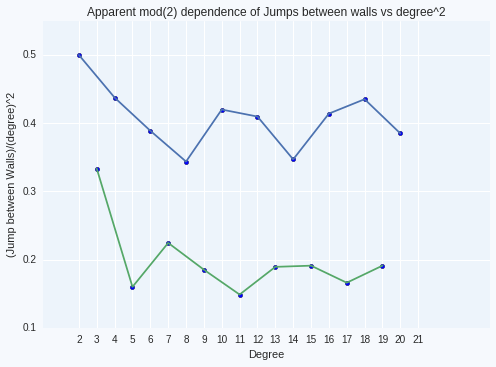

In [21]:
DWalls=[(DataGIT["NumberWalls"][i+1]-DataGIT["NumberWalls"][i])/i**2  
        for i in DataGIT["NumberWalls"].index[:-1]]

plt.scatter(DataGIT.index[:-1], DWalls )
plt.plot([i for i in DataGIT.index[:-1] if i%2==0], 
         [ DWalls[i] for i in range(len(DWalls)) if i%2==0] )
plt.plot([i for i in DataGIT.index[:-1] if i%2==1], 
         [ DWalls[i] for i in range(len(DWalls)) if i%2==1] )

plt.title("Apparent mod(2) dependence of Jumps between walls vs degree^2")
plt.ylabel("(Jump between Walls)/(degree)^2")
plt.xlabel("Degree")
plt.xticks(DataGIT.index)
plt.show()

# Relation between the 1-PS and the number of walls

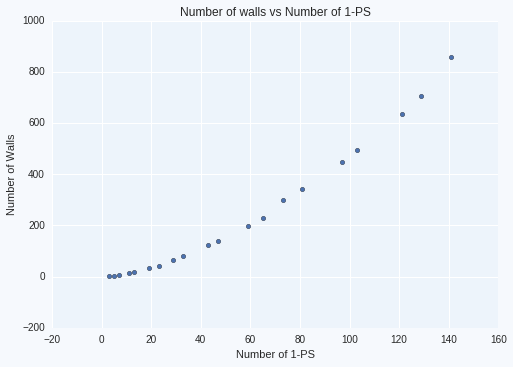

In [22]:
DataGIT.plot(kind="scatter", x="Number1PS", y="NumberWalls" ) 
#.get_xaxis().set_visible(False)
plt.xlabel("Number of 1-PS")
plt.ylabel("Number of Walls")
plt.title("Number of walls vs Number of 1-PS")
#plt.axis([1.8, 160, 0, 1000])
plt.show()

[[ 0.28288086]] [-0.21938532] 0.990906461527


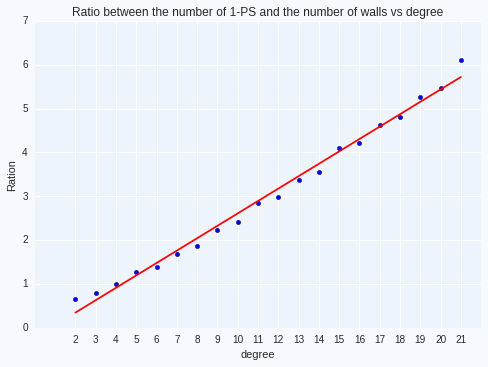

In [23]:
LY=[i[1]/(i[0]) for i in 
    zip( DataGIT["Number1PS"] , DataGIT["NumberWalls"]) ]

y_target=np.array(LY).reshape(len(LY),1)
X=DataGIT.index.values.reshape(len(DataGIT.index),1)
linear.fit(X,y_target)
y_pred=linear.predict(X)

print linear.coef_, linear.intercept_, linear.score(X,y_target)

plt.scatter(y=y_target,x=X)
plt.plot(X,y_pred, color="red")

plt.xticks(DataGIT.index)
plt.title("Ratio between the number of 1-PS and the number of walls vs degree")
plt.xlabel("degree")
plt.ylabel("Ration")
plt.axis([0,22,0,7])
plt.show()

In [13]:
DataGIT.tail(1)

,OPS,GITWalls,NumberWalls,Parameter,NumberFund1PS,Number1PS,NormalizedGITWalls,Diff_NormalizedGITWalls,Diff_GITWalls
21,"[(1, 0, -1), (25, 13, -38), (29, 5, -34), (2, ...","[0, 0.103448275862, 0.111111111111, 0.12, 0.12...",860,"[0, 1/31, 1/28, 1/25, 1/22, 1/19, 1/16, 2/29, ...",71,141,"[0.0, 0.00985221674877, 0.010582010582, 0.0114...","[0.00985221674877, 0.000729793833242, 0.000846...","[0.103448275862, 0.00766283524904, 0.008888888..."


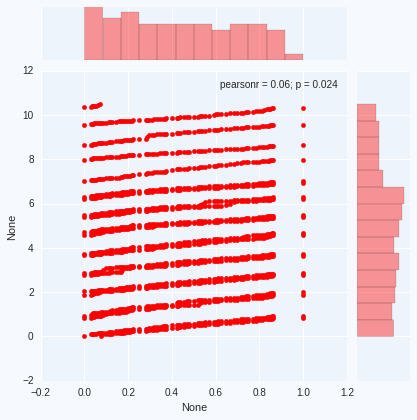

In [28]:
plt.figure(figsize=(10,5))
All1PS=[]
for i in DataGIT.index:
    All1PS=All1PS+DataGIT["Parameter"].ix[s]
AllWalls=[]
for j in DataGIT.index:
    AllWalls=AllWalls+DataGIT["GITWalls"].ix[s]
L1= Series(All1PS,dtype=float)
L2= Series(AllWalls,dtype=float) 
sns.jointplot( L1 , L2, color="red")
plt.show()

3


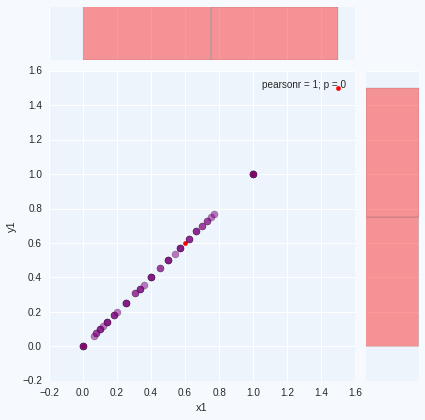

In [96]:
"""
plt.figure(figsize=(10,5))
for i in DataGIT.index[6:8]:
    L1= Series(DataGIT["Parameter"].ix[i],dtype=float)
    L2= Series(DataGIT["GITWalls"].ix[i],dtype=float) 
    graph=sns.jointplot( L1 , L2, color="red")
    graph.plot_joint(plt.scatter, marker="x")
    plt.show()
    
"""
i=3

print i
df1.x1 = Series(DataGIT["GITWalls"].ix[i],dtype=float) 
df1.y1 = Series(DataGIT["GITWalls"].ix[i],dtype=float) 
graph = sns.jointplot(x=df1.x1, y=df1.y1, color='r');
while i in DataGIT.index[:10]:   
    k=0.1+(0.9-0.1)*i/21
    graph.x = Series(DataGIT["Parameter"].ix[i+1],dtype=float) 
    graph.y = Series(DataGIT["Parameter"].ix[i+1],dtype=float) 
    graph.plot_joint(plt.scatter, c=(k,0,k,1), s=50,alpha=k)    
    i=i+2
 

Seaborn can actually do several order approximation

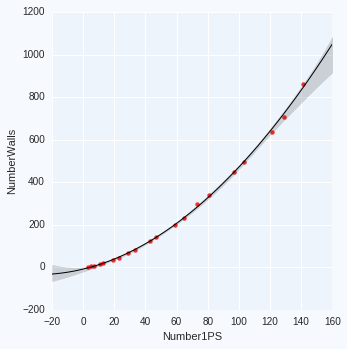

In [26]:
sns.lmplot("Number1PS","NumberWalls", DataGIT,order=3, scatter_kws={"color":"red"}, line_kws={"linewidth":1,"color":"black"})